In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
# https://www.datacamp.com/tutorial/face-detection-python-opencv

In [2]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

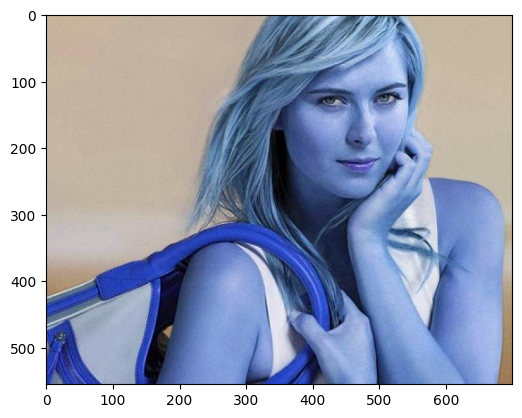

In [3]:
plt.imshow(img)

In [4]:
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey_img.shape

(555, 700)

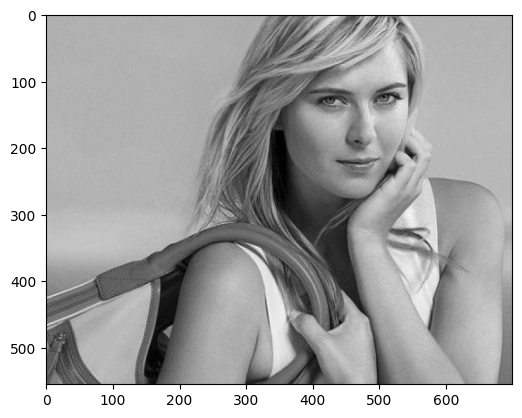

In [5]:
plt.imshow(grey_img, cmap='gray')

### Test face detection

In [6]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey_img, scaleFactor=1.3, minNeighbors=6, minSize=(40, 40))
faces

array([[352,  38, 233, 233]])

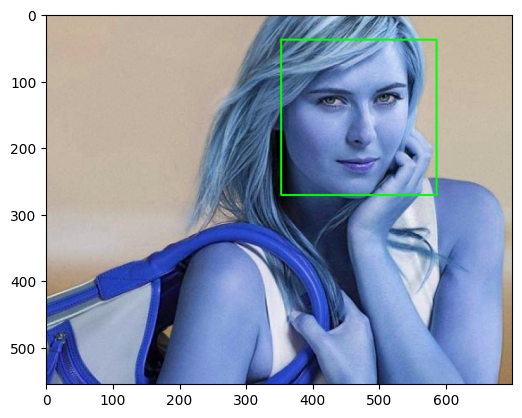

In [7]:
x, y, w, h = faces[0]
face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(face_img)

### Test eye detection

In [8]:
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

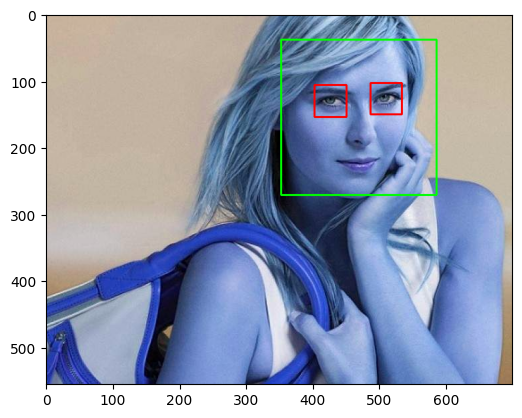

In [9]:
cv2.destroyAllWindows()
roi_grey = grey_img[y:y+h, x:x+w]
roi_colour = img[y:y+h, x:x+w]
eyes = eye_cascade.detectMultiScale(roi_grey)
for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_colour, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

### View region of interest after face and eye detection

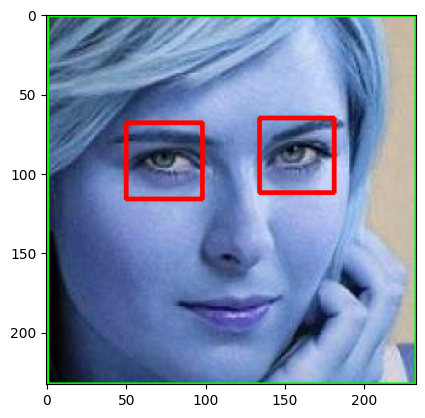

In [10]:
plt.imshow(roi_colour, cmap='gray')

### Automate cropping of faces from raw images

In [11]:
def crop_face_from_img(img_path):
    img = cv2.imread(img_path)
    grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(grey_img, scaleFactor=1.3, minNeighbors=6, minSize=(40, 40))
    for (x, y, w, h) in faces:
        roi_grey = grey_img[y:y+h, x:x+w]
        roi_colour = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_grey)
        if len(eyes) >= 2:
            return roi_colour

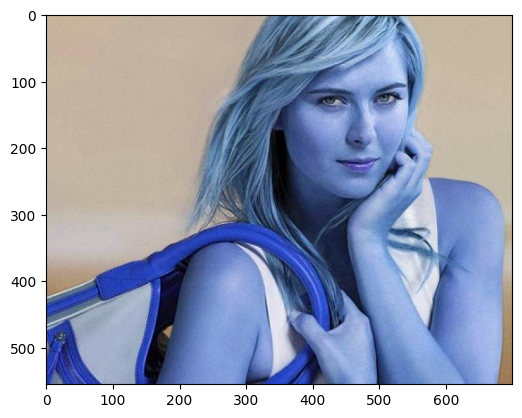

In [12]:
orig_img = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(orig_img)

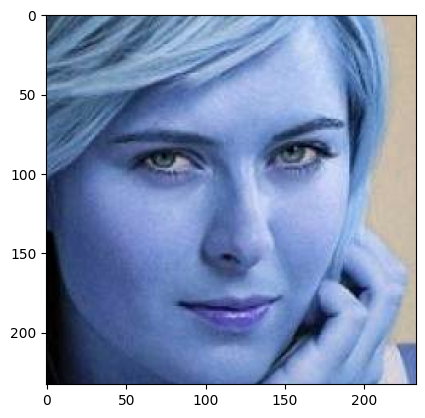

In [13]:
cropped_img = crop_face_from_img('./test_images/sharapova1.jpg')
plt.imshow(cropped_img)

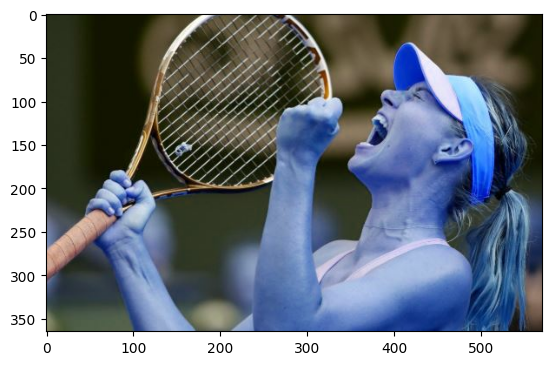

In [14]:
orig_img_obstructed = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(orig_img_obstructed)

In [15]:
cropped_image_no_2_eyes = crop_face_from_img('./test_images/sharapova2.jpg')
cropped_image_no_2_eyes

In [16]:
import os

RAW_DS_PATH = "./data/raw_images/"
raw_img_dirs = []
for f in os.scandir(RAW_DS_PATH):
    if f.is_dir():
        raw_img_dirs.append(f.path)
raw_img_dirs

['./data/raw_images/lionel_messi',
 './data/raw_images/maria_sharapova',
 './data/raw_images/roger_federer',
 './data/raw_images/serena_williams']

In [17]:
CLEANED_DS_PATH = "./data/cleaned_images/"
os.makedirs(CLEANED_DS_PATH, exist_ok=True)
try:
    for dir in raw_img_dirs:
        idx = 0
        celeb_name = dir.split('/')[-1]
        celeb_folder = CLEANED_DS_PATH + celeb_name
        os.makedirs(f"{celeb_folder}", exist_ok=True)
        for img in os.scandir(dir):
            roi_colour = crop_face_from_img(img.path)
            if roi_colour is not None:
                filename = celeb_name + str(idx) + ".png"
                cv2.imwrite(f"{celeb_folder}/{filename}", roi_colour)
                idx += 1
except Exception as e:
    print(e)

##### Still need to manually delete imgs that are not celeb faces